In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
y_train.shape

(50000, 1)

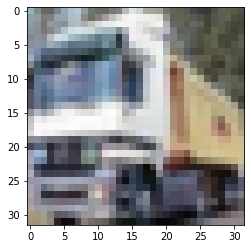

In [4]:
plt.imshow(x_train[1])

In [5]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(x,y,index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

def plot_result(x,y,index,title_str):
    plt.title(title_str)
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

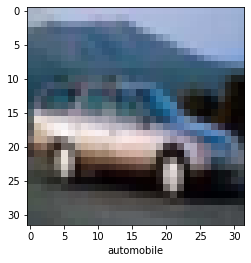

In [8]:
plot_sample(x_train,y_train,4)

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
cnn.fit(x_train,y_train,epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 102s 2ms/sample - loss: 1.5286 - accuracy: 0.4450
Epoch 2/10
50000/50000 [==============================] - 98s 2ms/sample - loss: 1.1747 - accuracy: 0.5866
Epoch 3/10
50000/50000 [==============================] - 97s 2ms/sample - loss: 1.0456 - accuracy: 0.6351
Epoch 4/10
50000/50000 [==============================] - 98s 2ms/sample - loss: 0.9574 - accuracy: 0.6673
Epoch 5/10
50000/50000 [==============================] - 86s 2ms/sample - loss: 0.8931 - accuracy: 0.6910
Epoch 6/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.8337 - accuracy: 0.7105
Epoch 7/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.7905 - accuracy: 0.7271
Epoch 8/10
50000/50000 [==============================] - 50s 1000us/sample - loss: 0.7518 - accuracy: 0.7385
Epoch 9/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.7159 - accuracy: 0.7498
Epoch 10/1

In [13]:
cnn.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 348us/sample - loss: 0.8811 - accuracy: 0.6997


[0.8811186638832093, 0.6997]

In [14]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[8.59928690e-03, 3.49777122e-03, 7.69372843e-03, 8.60799730e-01,
        5.06941520e-04, 4.97712269e-02, 2.17481423e-02, 2.88516876e-05,
        4.23623286e-02, 4.99188527e-03],
       [3.10126995e-03, 2.25624666e-02, 2.20674633e-06, 3.06720176e-06,
        7.49862679e-08, 5.21364107e-08, 2.58179516e-05, 6.74702960e-08,
        9.74247932e-01, 5.70573502e-05],
       [4.21452895e-02, 1.23246625e-01, 3.38694453e-03, 4.40054107e-03,
        2.82141636e-03, 2.86338705e-04, 8.20777146e-04, 2.32210453e-03,
        7.04883754e-01, 1.15686238e-01],
       [8.16601694e-01, 3.06565152e-03, 1.16364611e-02, 1.61970104e-03,
        1.17358274e-03, 4.36989903e-05, 5.10759710e-04, 1.15663599e-04,
        1.65187940e-01, 4.47226084e-05],
       [9.17252748e-07, 5.80392043e-06, 2.05786191e-02, 6.11178316e-02,
        5.46528637e-01, 4.91498038e-03, 3.66837978e-01, 2.73762748e-06,
        1.17656955e-05, 7.28621671e-07]], dtype=float32)

In [15]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 4, 6, 1, 6, 3, 1]

In [16]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [17]:
y_test=y_test.reshape(-1,)

In [18]:
actual_value1=0
predicted_value1=0
for i in range(0,len(y_test)):
    if(y_classes[i]==y_test[i]):
        actual_value1=y_test[i]
        predicted_value1=y_classes[i]
        print("actual value: "+str(y_test[i]))
        print("predicted value: "+str(y_classes[i]))
        print("position: "+str(i))
        break

actual value: 3
predicted value: 3
position: 0


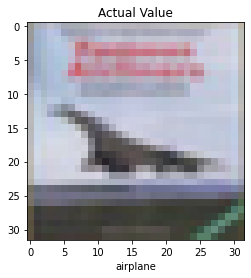

In [19]:
plot_result(x_test,y_test,actual_value1,"Actual Value")

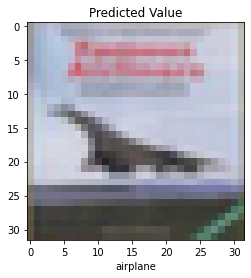

In [20]:
plot_result(x_test,y_test,actual_value1,"Predicted Value")

In [21]:
actual_value2=0
predicted_value2=0
for i in range(0,len(y_test)):
    if(y_classes[i]!=y_test[i]):
        actual_value2=y_test[i]
        predicted_value2=y_classes[i]
        print("actual value: "+str(y_test[i]))
        print("predicted value: "+str(y_classes[i]))
        print("position: "+str(i))
        break

actual value: 6
predicted value: 4
position: 4


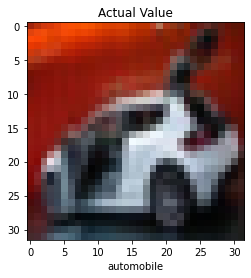

In [22]:
plot_result(x_test,y_test,actual_value2,"Actual Value")

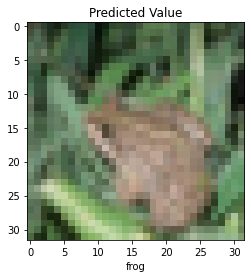

In [23]:
plot_result(x_test,y_test,predicted_value2,"Predicted Value")

In [24]:
image_read=cv2.imread("F:/DataSet/image/Webp.net-resizeimage.png")/255;
image_read.shape
# image_read

(32, 32, 3)

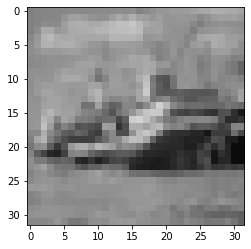

In [25]:

image_read=image_read.reshape(1,32,32,3)
plt.imshow(image_read[0])

In [26]:
y_p=cnn.predict(image_read)

In [27]:
y_p

array([[1.6767891e-02, 3.1007193e-02, 1.0948128e-04, 5.2241358e-04,
        3.6887457e-05, 3.5748403e-06, 1.3667481e-03, 7.2931434e-05,
        9.1579270e-01, 3.4320176e-02]], dtype=float32)

In [28]:
a = [np.argmax(element) for element in y_p]
a

[8]

In [29]:
classes[8]

'ship'